## About
This notebook will consist of 2 parts;
1. The comparison of Istanbul and Athens for the year 2022 
2. The categorical and numerical  analysis effecting price of Istanbul


In [1]:

%matplotlib inline


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns


import math



## Warnings and plotting settings

In [2]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['font.size'] = 15

import warnings
warnings.filterwarnings('ignore')

## Read the Data
I used the insider airbnb data and uploaded to Kaggle.
You can find the details about the data [here](http://insideairbnb.com/get-the-data.html).

In [3]:
calendar_is = pd.read_csv('calendar_is.csv', parse_dates = ['date']).drop(columns=['adjusted_price', 'minimum_nights', 'maximum_nights'])
calendar_at = pd.read_csv('calendar_at.csv', parse_dates = ['date']).drop(columns=['adjusted_price', 'minimum_nights', 'maximum_nights'])
calendar_is.head()

,listing_id,date,available,price
0,630800,2021-11-28,f,$376.00
1,630800,2021-11-29,f,$376.00
2,630800,2021-11-30,f,$376.00
3,630800,2021-12-01,f,$376.00
4,630800,2021-12-02,f,$376.00


## Changing price to float
The 'price' column is in str format. We will change it to float number. 
Also the price data is in $ format but it is actually in local currency so we need to convert it.

In [4]:
calendar_is['price'] =  calendar_is['price'].str.replace(r'[^-+\d.]', '').astype(float)
calendar_is['price'] = calendar_is['price'] / 15  # convert Turkish liras to Euro for comparison reasons.
calendar_at['price'] =  calendar_at['price'].str.replace(r'[^-+\d.]', '').astype(float)

## Change Available to number

In [5]:
calendar_is['available'] = calendar_is['available'].map({'t':1, 'f':0})
calendar_at['available'] = calendar_at['available'].map({'t':1, 'f':0})

I also drop the first and last dates becauses these dates only half of the datas.

In [6]:
calendar_at.drop(calendar_at[(calendar_at['date'] == '2022-11-22') | (calendar_at['date'] == '2021-11-22')].index, inplace = True)
calendar_is.drop(calendar_is[(calendar_is['date'] == '2022-11-28') | (calendar_is['date'] == '2021-11-28')].index, inplace = True)

In [7]:
calendar_is.head()

,listing_id,date,available,price
1,630800,2021-11-29,0,25.066667
2,630800,2021-11-30,0,25.066667
3,630800,2021-12-01,0,25.066667
4,630800,2021-12-02,0,25.066667
5,630800,2021-12-03,0,25.066667


# 1) Price Comparision between Athens and Istanbul 
Now the data is ready, we will look at the price comparison

No handles with labels found to put in legend.


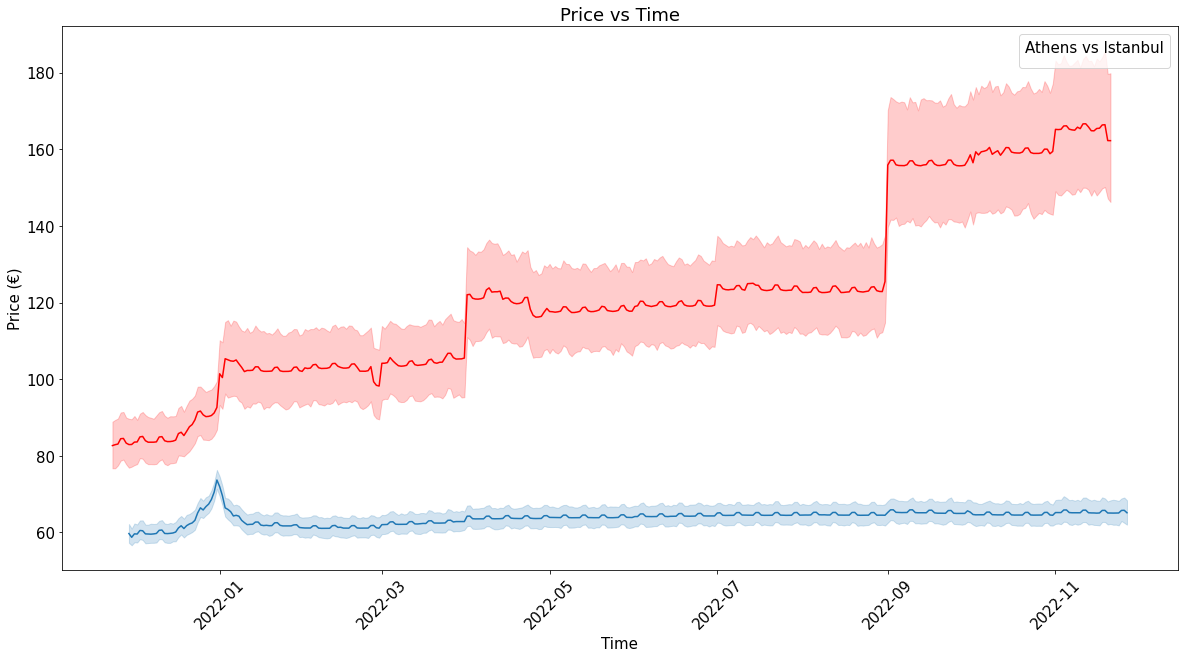

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "date", y = "price", 
                  markers = True, dashes = False, color= 'red', data = calendar_at, ax=ax)
sns.lineplot(x = "date", y = "price", 
                  markers = True, dashes = False, data = calendar_is, ax=ax)
plt.xticks(rotation = 45)
plt.title('Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price (€)')
plt.legend(loc='best', title= 'Athens vs Istanbul')

## Listed Houses 
Listed daily number of houses.

In [9]:
listed_is =  calendar_is.groupby('date').agg({'listing_id':'count','available':'mean'})
listed_is.columns = ['listed', 'available_prop']
listed_is['available_house_nums'] = listed_is['listed'] * listed_is['available_prop']
listed_is.reset_index()


,date,listed,available_prop,available_house_nums
0,2021-11-29,22714,0.477635,10849.0
1,2021-11-30,22714,0.577133,13109.0
2,2021-12-01,22714,0.626090,14221.0
3,2021-12-02,22714,0.643964,14627.0
4,2021-12-03,22714,0.642511,14594.0
...,...,...,...,...
359,2022-11-23,22715,0.696192,15814.0
360,2022-11-24,22715,0.696236,15815.0
361,2022-11-25,22715,0.696324,15817.0
362,2022-11-26,22715,0.696324,15817.0


In [10]:
listed_at =  calendar_at.groupby('date').agg({'listing_id':'count','available':'mean'})

listed_at.columns = ['listed', 'available_prop']
listed_at['available_house_nums'] = listed_at['listed'] * listed_at['available_prop']
listed_at.reset_index()

,date,listed,available_prop,available_house_nums
0,2021-11-23,9632,0.295577,2847.0
1,2021-11-24,9632,0.351744,3388.0
2,2021-11-25,9632,0.359427,3462.0
3,2021-11-26,9632,0.344477,3318.0
4,2021-11-27,9632,0.351537,3386.0
...,...,...,...,...
359,2022-11-17,9632,0.619394,5966.0
360,2022-11-18,9632,0.619913,5971.0
361,2022-11-19,9632,0.619809,5970.0
362,2022-11-20,9632,0.620536,5977.0


## Listed Houses in a million of Population

In [11]:
# Population of Istanbul from Wikipedia
pop_is = 15460000
# Population of Athens from Wikipedia
pop_at = 3167000

proportion_is = (listed_is['listed'].mean() / pop_is) *10e5
proportion_at = (listed_at['listed'].mean() / pop_at) * 10e5

print('Listed houses in a million, Athens vs İstanbul is:', proportion_at, 'vs', proportion_is)

Listed houses in a million, Athens vs İstanbul is: 3041.364066940322 vs 1469.2160200730702


No handles with labels found to put in legend.


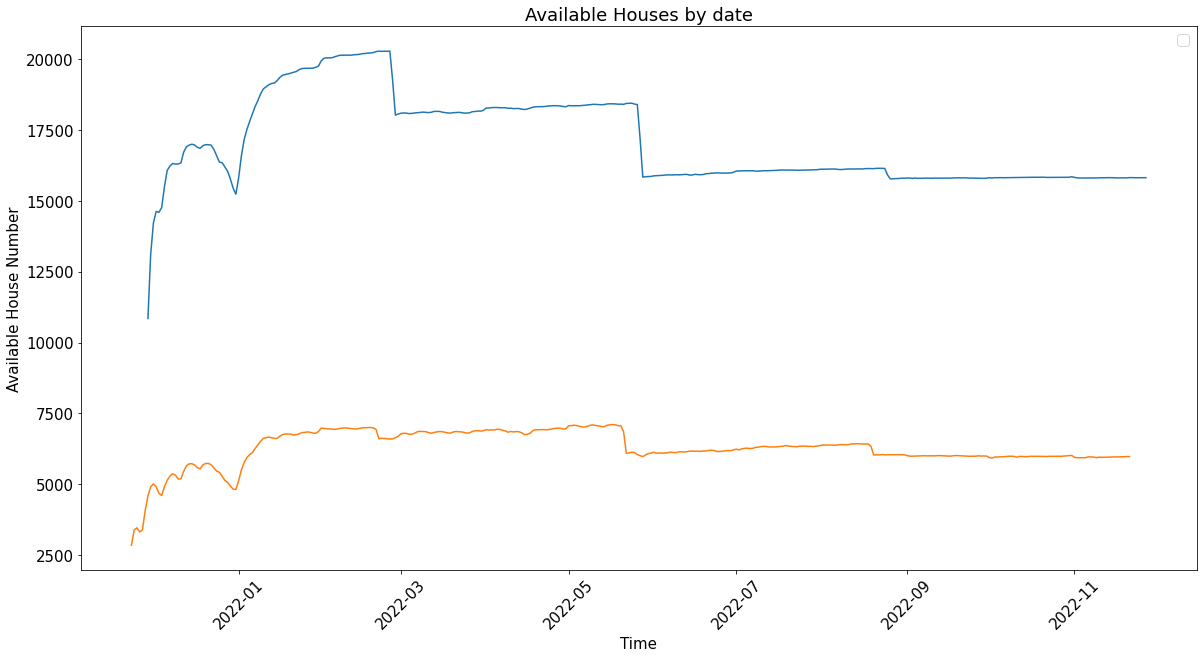

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
                       
sns.lineplot(x = 'date', y = "available_house_nums", 
                   data = listed_is, ax=ax)
sns.lineplot(x = 'date', y = "available_house_nums", 
                   data = listed_at, ax=ax)

plt.xticks(rotation = 45)
plt.title('Available Houses by date')
plt.xlabel('Time')
plt.ylabel('Available House Number')
plt.legend(loc='best')

No handles with labels found to put in legend.


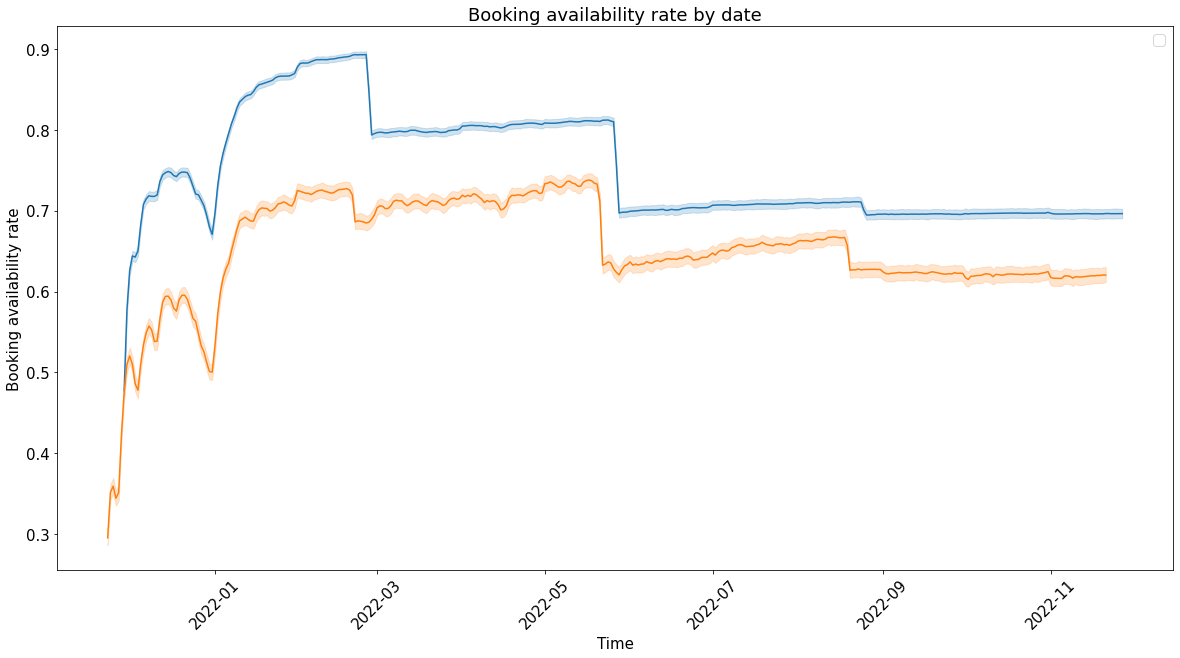

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
                       
sns.lineplot(x = "date", y = "available", 
                  markers = True, dashes = False, data = calendar_is, ax=ax)
sns.lineplot(x = "date", y = "available", 
                  markers = True, dashes = False, data = calendar_at, ax=ax)

plt.xticks(rotation = 45)
plt.title('Booking availability rate by date')
plt.xlabel('Time')
plt.ylabel('Booking availability rate')
plt.legend(loc='best')

# 2) The categorical and numerical  analysis effecting price of Istanbul

## Merge with neighbourhood data for price and availability

In [14]:
listings_is = pd.read_csv('listings.csv')

In [15]:
listings_neigh = listings_is[['id','neighbourhood_cleansed','room_type','bedrooms']].rename(columns={'id': 'listing_id'}).set_index('listing_id')
merged_table = pd.merge(calendar_is, listings_neigh, on='listing_id')
merged_table.head()

,listing_id,date,available,price,neighbourhood_cleansed,room_type,bedrooms
0,630800,2021-11-29,0,25.066667,Beyoglu,Entire home/apt,2.0
1,630800,2021-11-30,0,25.066667,Beyoglu,Entire home/apt,2.0
2,630800,2021-12-01,0,25.066667,Beyoglu,Entire home/apt,2.0
3,630800,2021-12-02,0,25.066667,Beyoglu,Entire home/apt,2.0
4,630800,2021-12-03,0,25.066667,Beyoglu,Entire home/apt,2.0


We'll choose top 6 areas for the analysis

In [16]:
nbhood_df = merged_table.groupby(['neighbourhood_cleansed']).agg({'listing_id':'count', 'price':'mean', 'available':'mean'})
nbhood_df['listed_nums'] = nbhood_df['listing_id']/364
top_nbhood = nbhood_df.sort_values(['listed_nums'], ascending=False).iloc[:6].reset_index()
top_nbhood

,neighbourhood_cleansed,listing_id,price,available,listed_nums
0,Beyoglu,2093728,64.998145,0.752951,5752.0
1,Fatih,1078168,70.232819,0.835673,2962.0
2,Sisli,1030484,77.220732,0.760951,2831.0
3,Kadikoy,670124,34.865938,0.680201,1841.0
4,Besiktas,473564,58.824926,0.681562,1301.0
5,Uskudar,223860,59.850761,0.695810,615.0


No handles with labels found to put in legend.


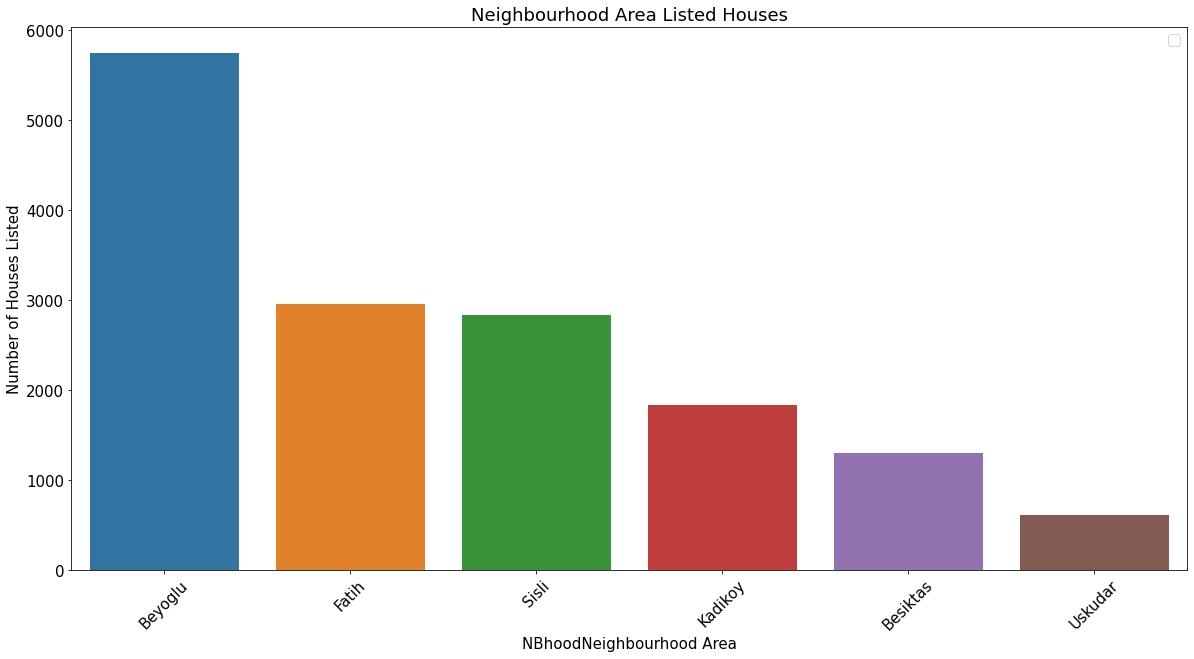

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x = 'neighbourhood_cleansed',y = 'listed_nums',data = top_nbhood)
plt.xticks(rotation = 45)
plt.title('Neighbourhood Area Listed Houses')
plt.xlabel('NBhoodNeighbourhood Area')
plt.ylabel('Number of Houses Listed')
plt.legend(loc='best')


No handles with labels found to put in legend.


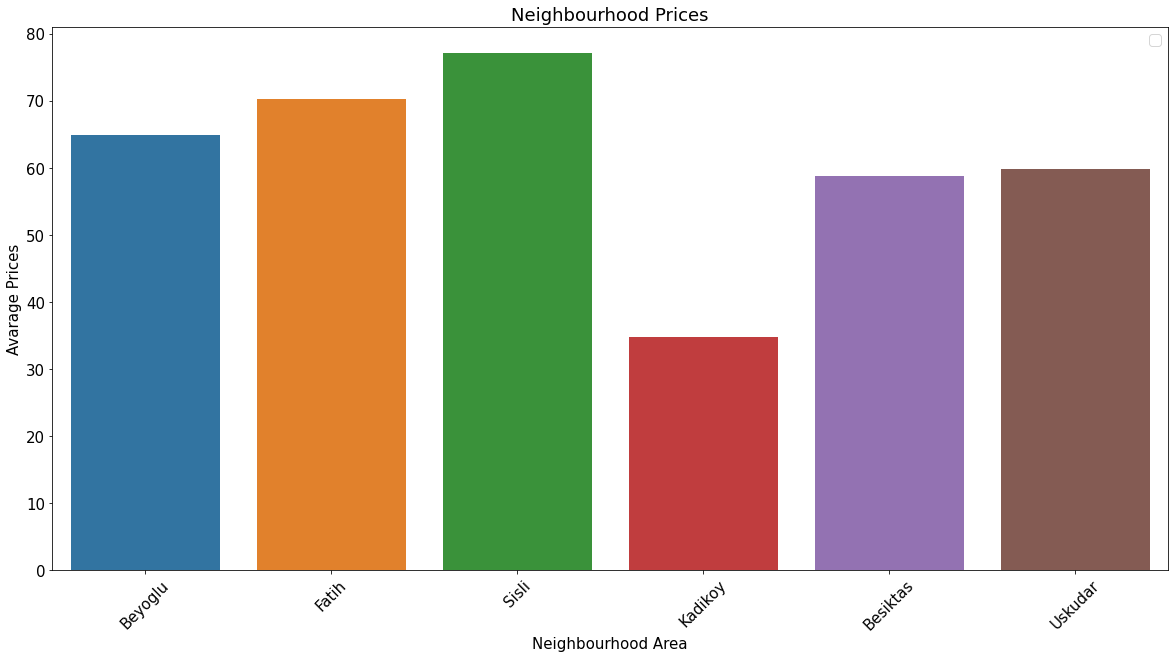

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot( x = 'neighbourhood_cleansed',y = 'price',data = top_nbhood)
plt.xticks(rotation = 45)
plt.title('Neighbourhood Prices')
plt.xlabel('Neighbourhood Area')
plt.ylabel('Avarage Prices')
plt.legend(loc='best')

In [19]:
top_price = nbhood_df.sort_values(['price'], ascending = False).iloc[:6].reset_index()
top_price.head()

,neighbourhood_cleansed,listing_id,price,available,listed_nums
0,Silivri,12740,176.354113,0.721821,35.0
1,Sariyer,101556,169.254197,0.756184,279.0
2,Beykoz,41132,160.792642,0.723087,113.0
3,Kucukcekmece,61152,117.339212,0.724915,168.0
4,Basaksehir,80808,108.835119,0.679079,222.0


No handles with labels found to put in legend.


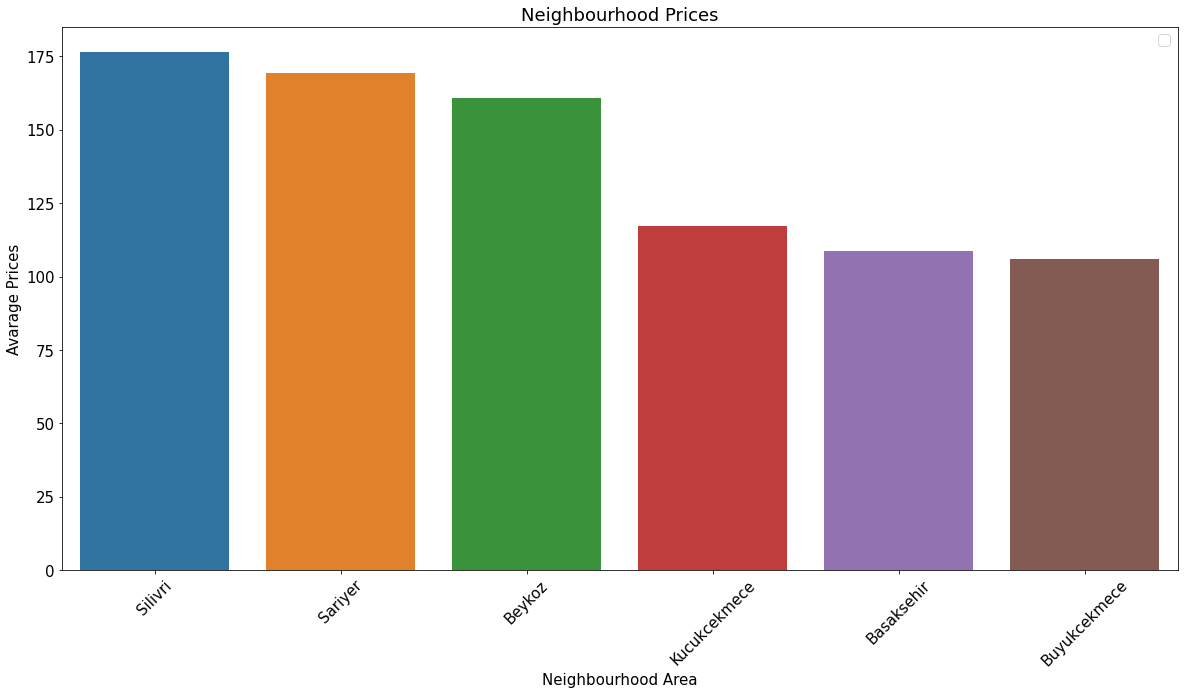

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot( x = 'neighbourhood_cleansed',y = 'price',data = top_price)
plt.xticks(rotation = 45)
plt.title('Neighbourhood Prices')
plt.xlabel('Neighbourhood Area')
plt.ylabel('Avarage Prices')
plt.legend(loc='best')

Now we will look how room type affect prices

In [21]:
room_type_df = merged_table.groupby(['room_type']).agg({'listing_id':'count', 'price':'mean', 'available':'mean'})
room_type_df['listed_nums'] = room_type_df['listing_id']/364
room_type_df = room_type_df.sort_values(['price']).reset_index()
room_type_df.head()

,room_type,listing_id,price,available,listed_nums
0,Shared room,154700,35.606738,0.751215,425.00000
1,Private room,2914912,43.928408,0.751044,8008.00000
2,Entire home/apt,4270477,77.750331,0.740045,11732.07967
3,Hotel room,205660,97.785189,0.865107,565.00000


No handles with labels found to put in legend.


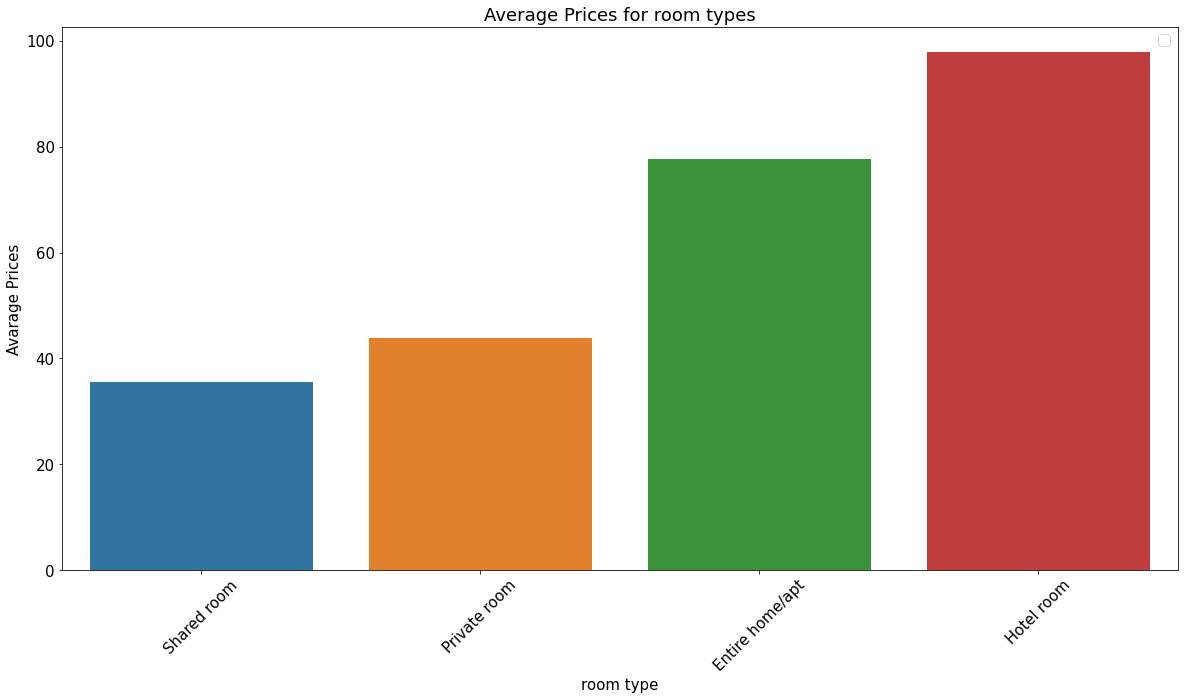

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot( x = 'room_type',y = 'price',data = room_type_df)
plt.xticks(rotation = 45)
plt.title('Average Prices for room types')
plt.xlabel('room type')
plt.ylabel('Avarage Prices')
plt.legend(loc='best')
plt.savefig('10')

# Price Correlation and Preprocessing for Listings İstanbul

We will select related columns from Listings İstanbul dataset for price correlation analysis

In [24]:
cols = [
    'id',
    'host_id',
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'availability_30',
    'minimum_nights',
]

data = pd.read_csv('listings.csv', usecols=cols)

In [25]:
data.head()

,id,host_id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,20815,78838,f,t,f,Besiktas,Entire rental unit,Entire home/apt,3,2.0,2.0,"$1,235.00",365,28,41,4.5
1,27271,117026,f,t,t,Beyoglu,Entire rental unit,Entire home/apt,2,1.0,1.0,$408.00,30,1,2,5.0
2,28277,121607,t,t,t,Sisli,Entire serviced apartment,Entire home/apt,5,1.0,2.0,$688.00,14,22,1,5.0
3,28318,121721,f,t,t,Sariyer,Entire rental unit,Entire home/apt,2,2.0,2.0,"$1,412.00",3,28,0,NaN
4,29241,125742,f,t,f,Beyoglu,Private room in rental unit,Private room,3,1.0,1.0,$515.00,3,30,0,NaN


# Missing values in the data

In [26]:
for col in data.columns:
    print (col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_is_superhost, Number of Missing Values: 0
host_has_profile_pic, Number of Missing Values: 0
host_identity_verified, Number of Missing Values: 0
neighbourhood_cleansed, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bedrooms, Number of Missing Values: 1458
beds, Number of Missing Values: 1167
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 10190


In [27]:
# convert formatting for price
data['price'] = data['price'].str.replace(r'[^-+\d.]', '').astype(float)

data = data.dropna(how='any', subset=['bedrooms', 'beds'])  #drop missing values
data = data.drop(columns=['number_of_reviews','review_scores_rating']) # drop missing columns

In [28]:
data.describe()

,id,host_id,accommodates,bedrooms,beds,price,minimum_nights,availability_30
count,2.014800e+04,2.014800e+04,20148.00000,20148.000000,20148.000000,20148.000000,20148.000000,20148.000000
mean,3.839711e+07,2.013700e+08,3.33646,1.536629,2.218037,945.496129,6.756353,20.473943
std,1.535765e+07,1.484108e+08,2.20537,1.666221,2.765869,2479.494759,34.836095,10.803716
min,2.081500e+04,1.969200e+04,1.00000,1.000000,1.000000,49.000000,1.000000,0.000000
25%,3.170098e+07,4.375800e+07,2.00000,1.000000,1.000000,309.000000,1.000000,14.000000
50%,4.382512e+07,2.113645e+08,3.00000,1.000000,2.000000,561.000000,2.000000,26.000000
75%,5.081153e+07,3.413031e+08,4.00000,2.000000,3.000000,957.000000,3.000000,29.000000
max,5.403525e+07,4.377308e+08,16.00000,50.000000,195.000000,103026.000000,1000.000000,30.000000


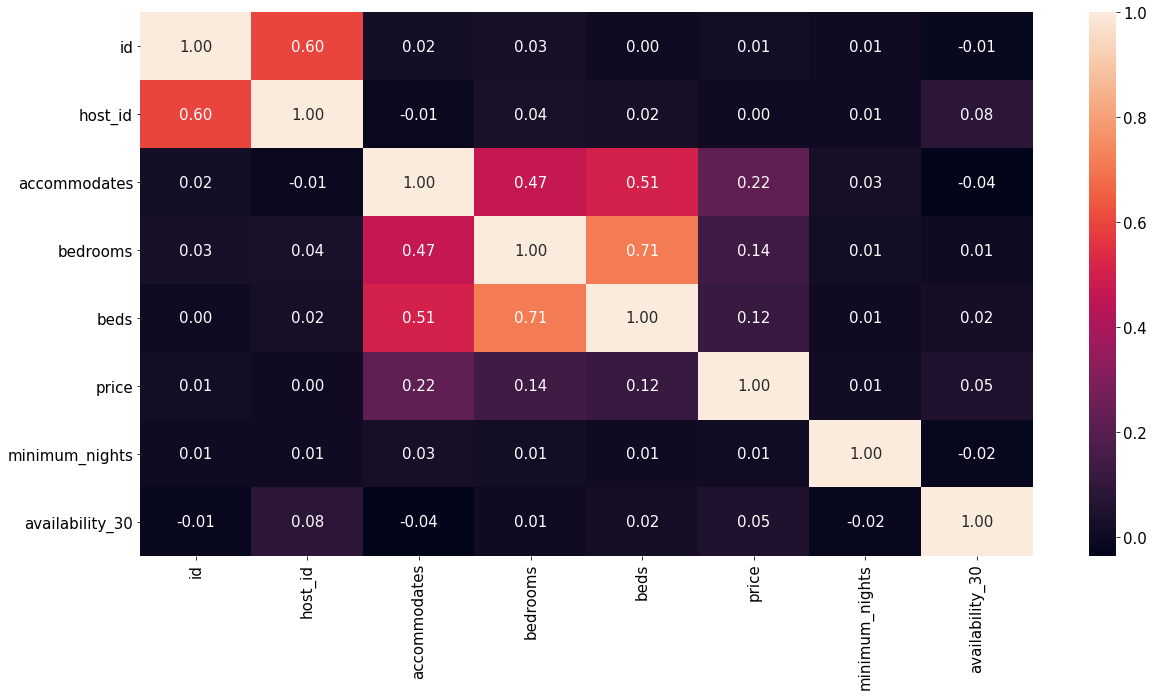

In [29]:
sns.heatmap(data.corr(), annot=True, fmt=".2f");

There are outliers and also misinformed data in price, bedrooms, beds , minimum nights and availability_30 data

# Cleaning misinformed data

In [30]:
data = data[data['availability_30'] != 0]
data = data[data['bedrooms'] < 20]
data = data[data['beds'] < 50]
data = data[data['price'] < 20000.00]
data = data[data['minimum_nights'] < 30]

In [31]:
data.describe()

,id,host_id,accommodates,bedrooms,beds,price,minimum_nights,availability_30
count,1.671600e+04,1.671600e+04,16716.000000,16716.000000,16716.000000,16716.000000,16716.000000,16716.000000
mean,3.855651e+07,2.038240e+08,3.328667,1.484925,2.176478,891.770400,2.524109,23.773271
std,1.537564e+07,1.489656e+08,2.216225,1.075749,1.961999,1234.238375,3.126693,7.423720
min,2.827700e+04,1.969200e+04,1.000000,1.000000,1.000000,49.000000,1.000000,1.000000
25%,3.189186e+07,4.483293e+07,2.000000,1.000000,1.000000,337.000000,1.000000,21.000000
50%,4.396430e+07,2.137863e+08,3.000000,1.000000,2.000000,583.000000,1.000000,27.000000
75%,5.102362e+07,3.458259e+08,4.000000,2.000000,3.000000,999.000000,3.000000,29.000000
max,5.403525e+07,4.377308e+08,16.000000,19.000000,49.000000,19371.000000,29.000000,30.000000


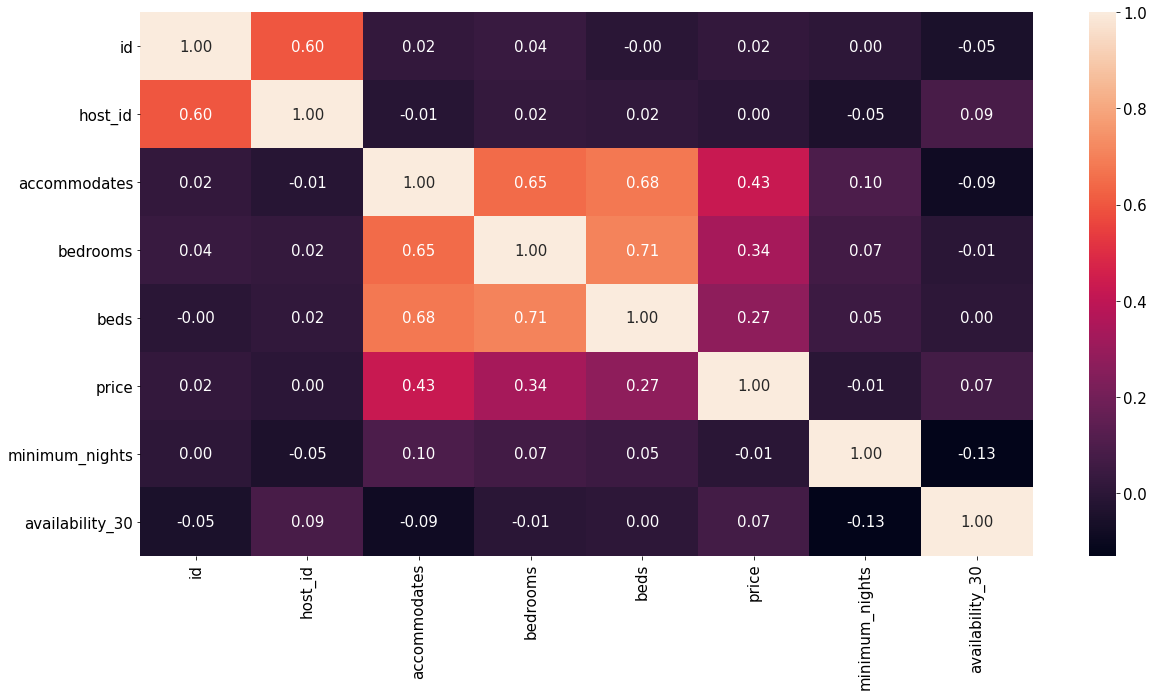

In [32]:

sns.heatmap(data.corr(), annot=True, fmt=".2f");